In [1]:
import os
os.chdir("..")
os.chdir("src")
from data_cleaning import DataCleaning
from utils.nlp import remove_stop_words, preprocess
os.chdir("..")
import pandas as pd
from top2vec import Top2Vec
import torch
import numpy as np
pd.set_option('display.max_colwidth', None)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

2024-04-13 22:08:18.976677: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-13 22:08:18.979012: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 22:08:19.007021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-13 22:08:19.505070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_cleaning_pipeline = DataCleaning()
df = data_cleaning_pipeline.run()

2024-04-13 22:08:20 - INFO - Data loaded!
2024-04-13 22:08:20 - INFO - Null values cleaned!
2024-04-13 22:08:20 - INFO - Data types asserted!
2024-04-13 22:08:20 - INFO - Full data cleaned!


## Top2Vec

In [3]:
# pip install top2vec

In [4]:
docs = df["DS_OBJETO"].values.tolist()

In [5]:
# model = Top2Vec(documents=documents, min_count=50, embedding_model='universal-sentence-encoder-multilingual')

In [6]:
import nltk
nltk.download('punkt')

def top2vec_tokenizer(text):
    
    text = nltk.word_tokenize(text.lower(), language="portuguese")
    text = [preprocess(word) for word in text]
    text = list(filter(None, text))
    text = remove_stop_words(text)
    text = [word for word in text if "rs" not in word]

    return text

[nltk_data] Downloading package punkt to
[nltk_data]     /home/brunodifranco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# universal-sentence-encoder-multilingual-large
# distiluse-base-multilingual-cased
# all-MiniLM-L6-v2
# paraphrase-multilingual-MiniLM-L12-v2

In [8]:
model = Top2Vec(
    documents=docs,
    min_count=50,
    # embedding_model="universal-sentence-encoder-multilingual",
    # embedding_model="doc2vec", # ficou mt ruim
    # embedding_model="distiluse-base-multilingual-cased", # ficou ruim tbm
    # embedding_model="paraphrase-multilingual-MiniLM-L12-v2", 
    # embedding_model="all-MiniLM-L6-v2", 
    embedding_model="universal-sentence-encoder-multilingual-large", 
    tokenizer=top2vec_tokenizer,
    # gpu_hdbscan=True,
    # gpu_umap=True,
)


2024-04-13 22:08:21,165 - top2vec - INFO - Pre-processing documents for training
2024-04-13 22:08:21 - INFO - Pre-processing documents for training
/home/brunodifranco/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-04-13 22:09:04,011 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual-large model
2024-04-13 22:09:04 - INFO - Downloading universal-sentence-encoder-multilingual-large model
2024-04-13 22:09:34.881266: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-13 22:09:34.883245: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libra

In [8]:
# cosine_scores = []

# for index, num_docs in model.topic_sizes.items():
#     documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=index, num_docs=num_docs)
#     cosine_scores.append(np.mean(document_scores))

# np.mean(cosine_scores)

In [10]:
new_topics = model.hierarchical_topic_reduction(num_topics=5)

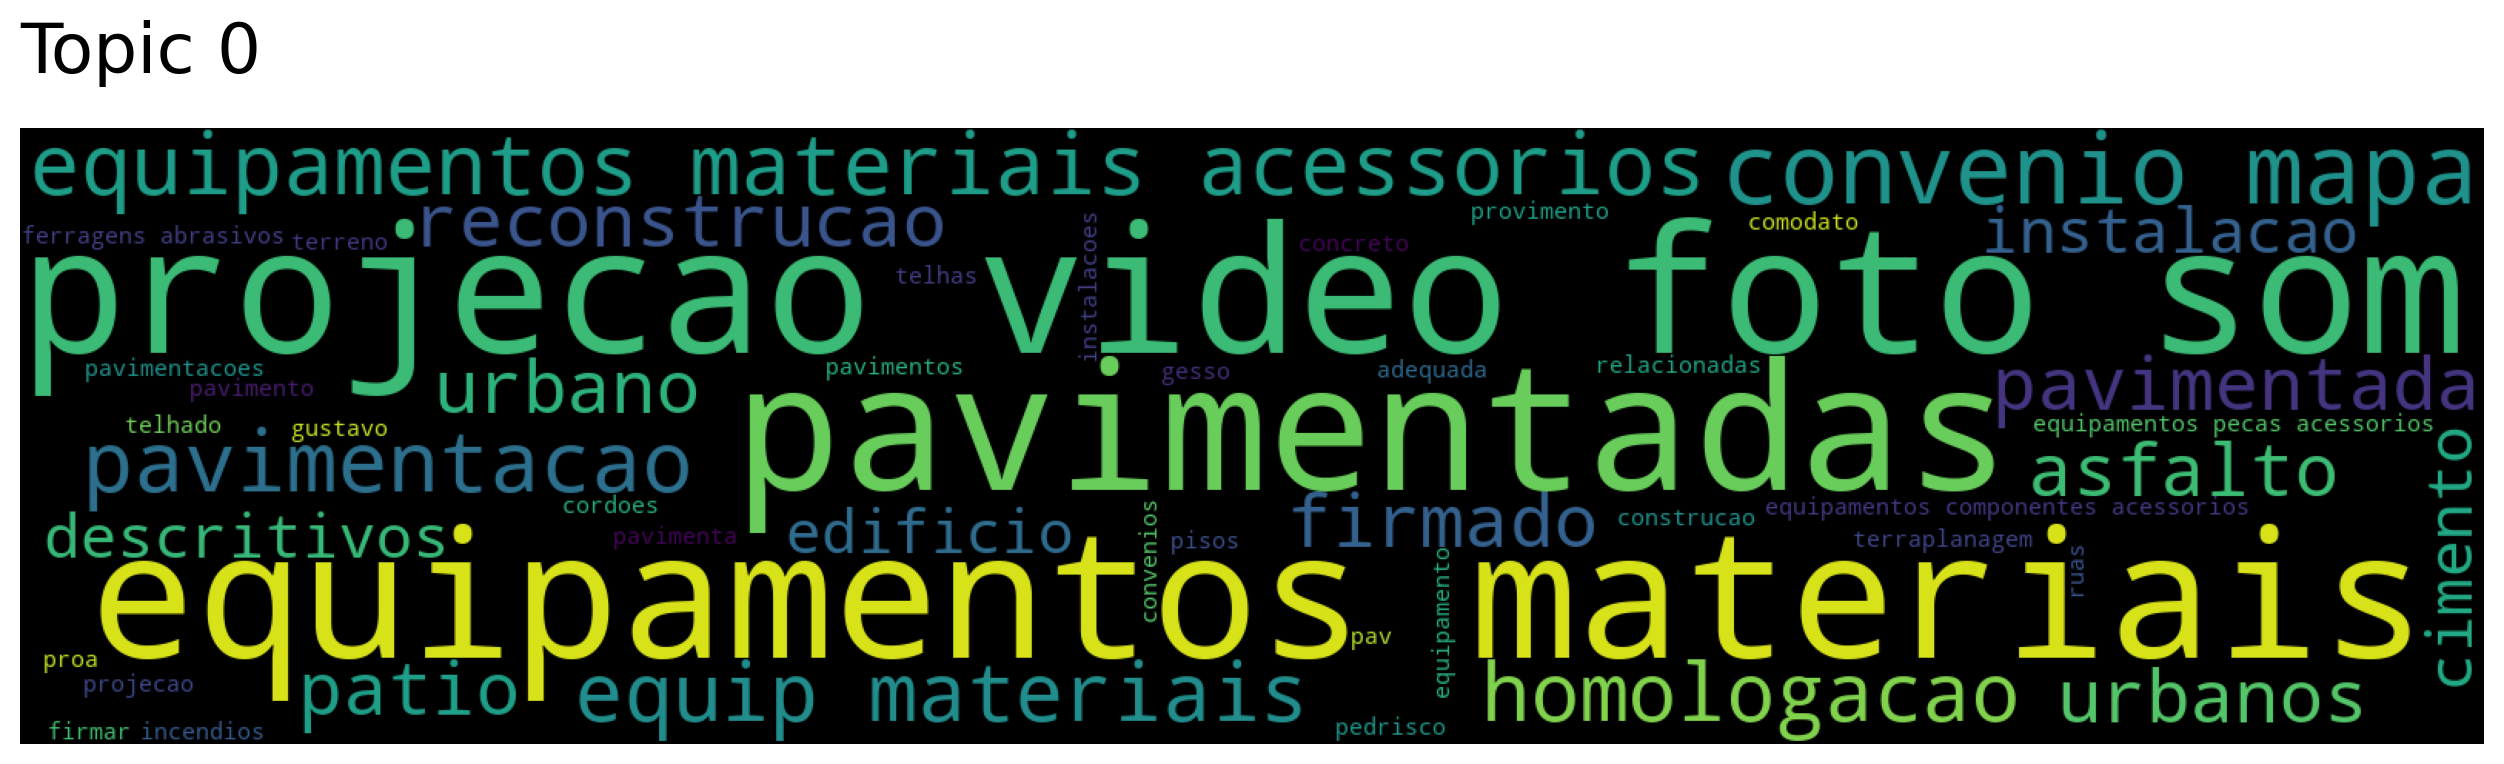

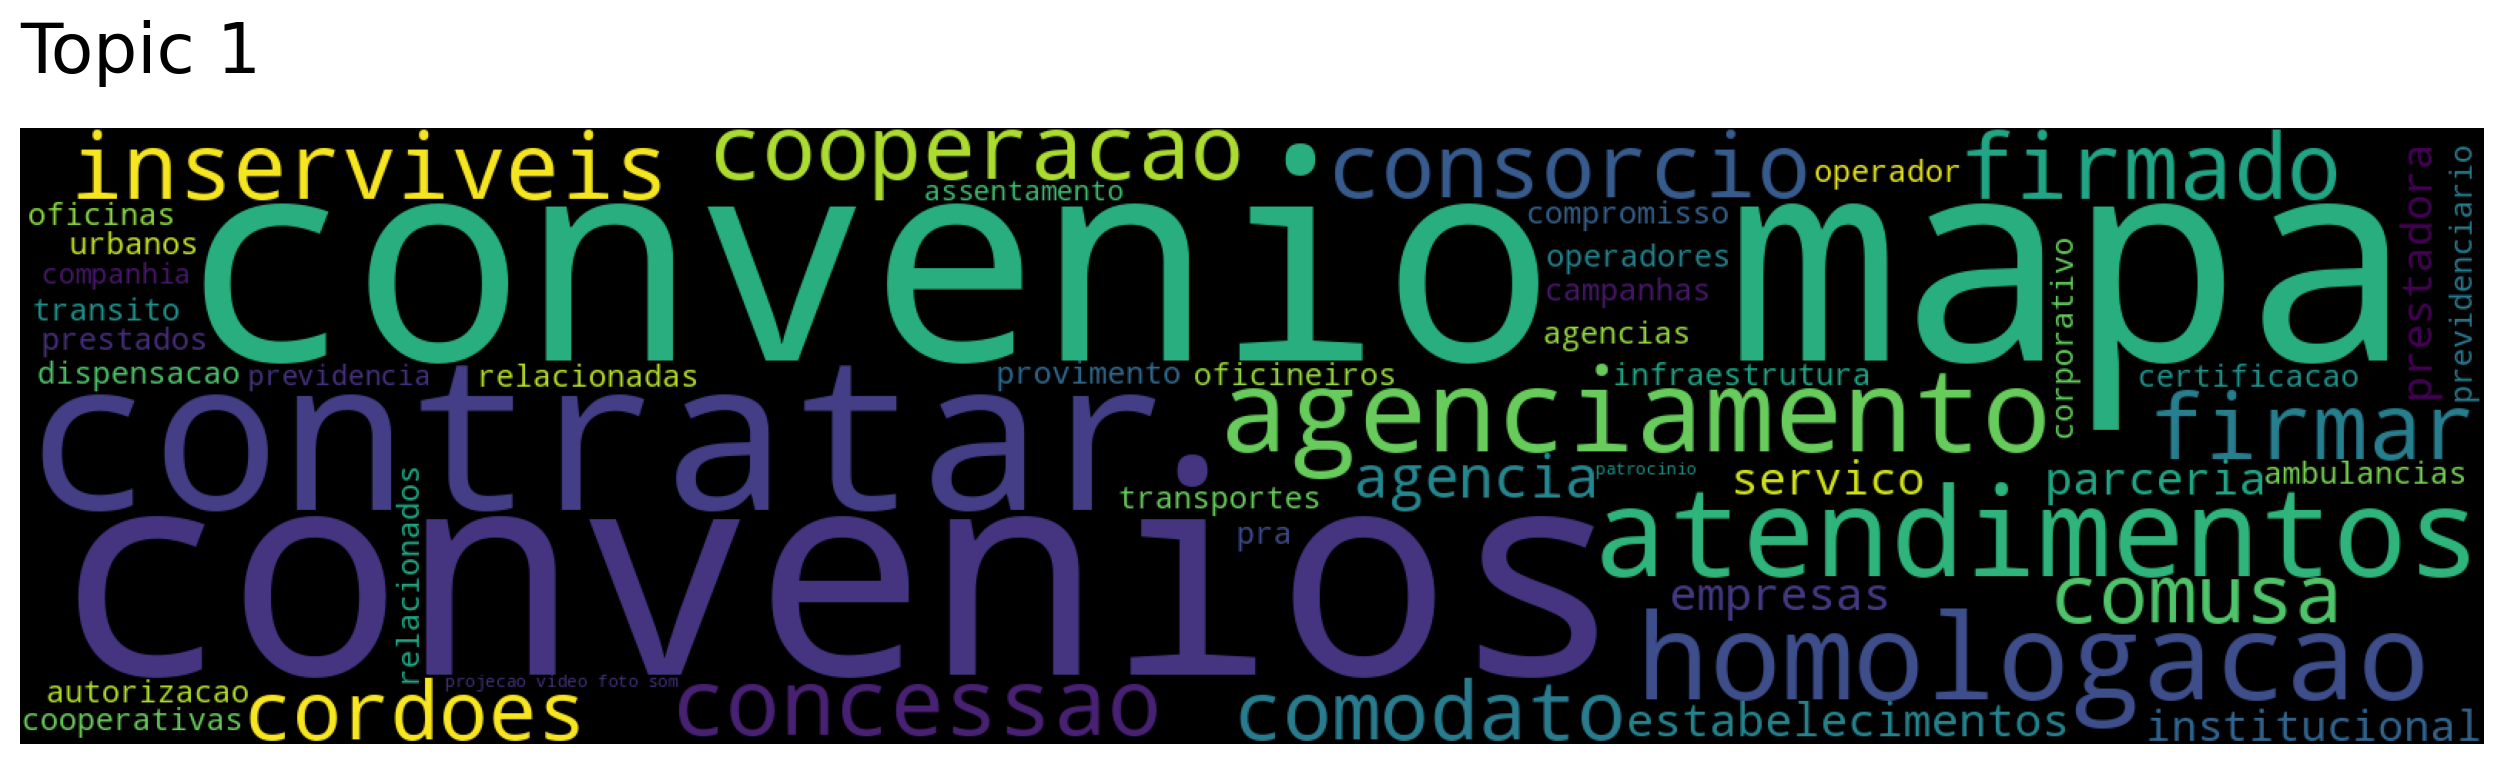

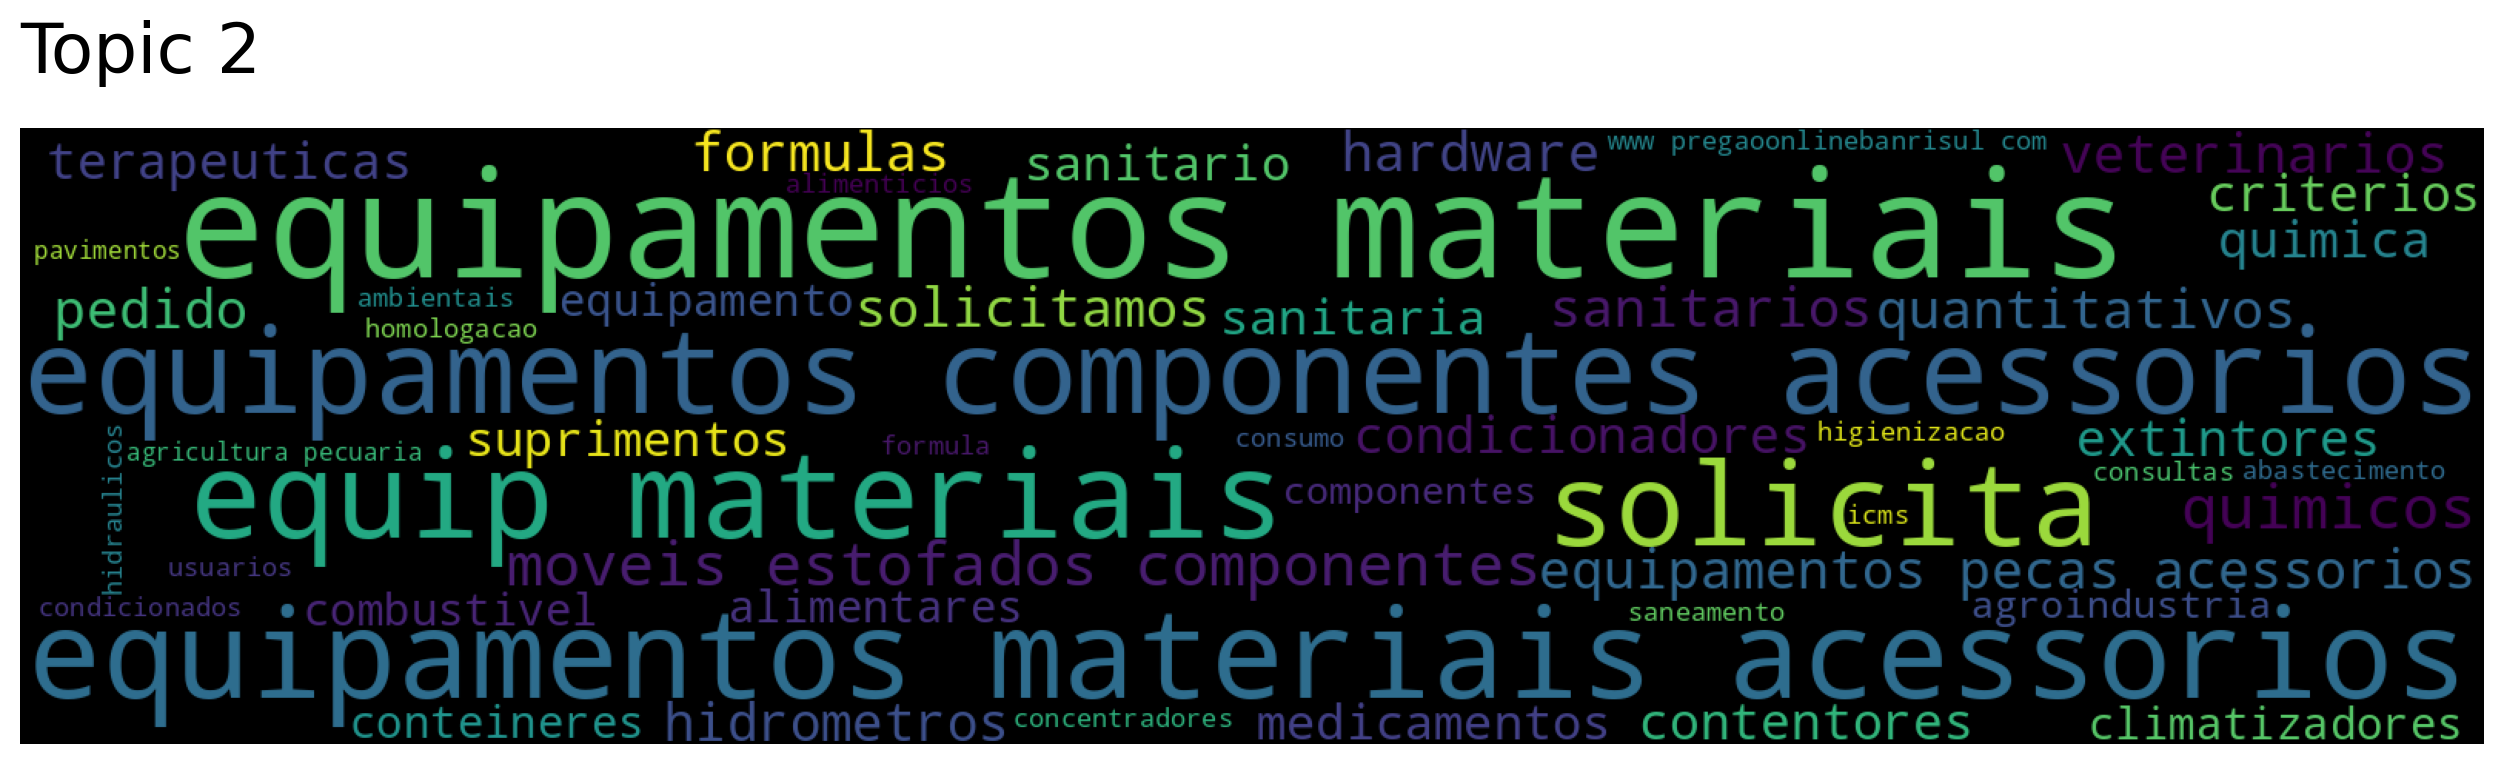

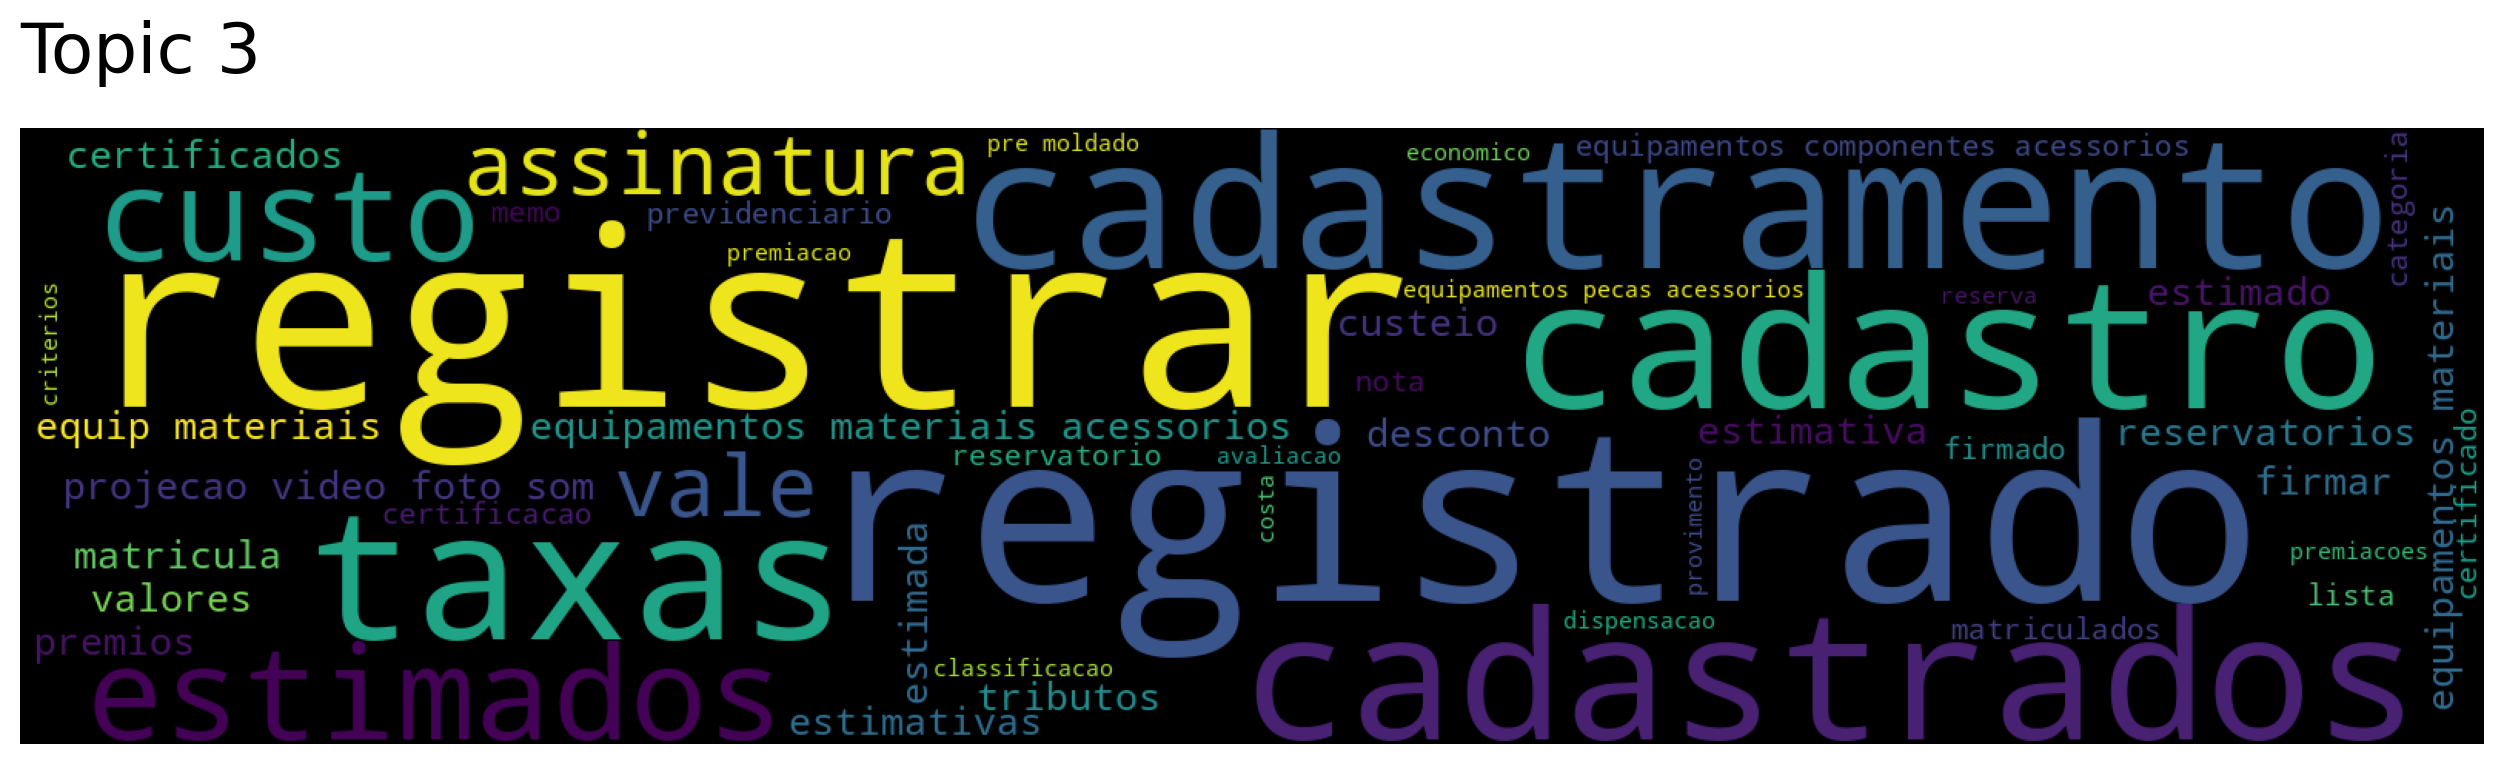

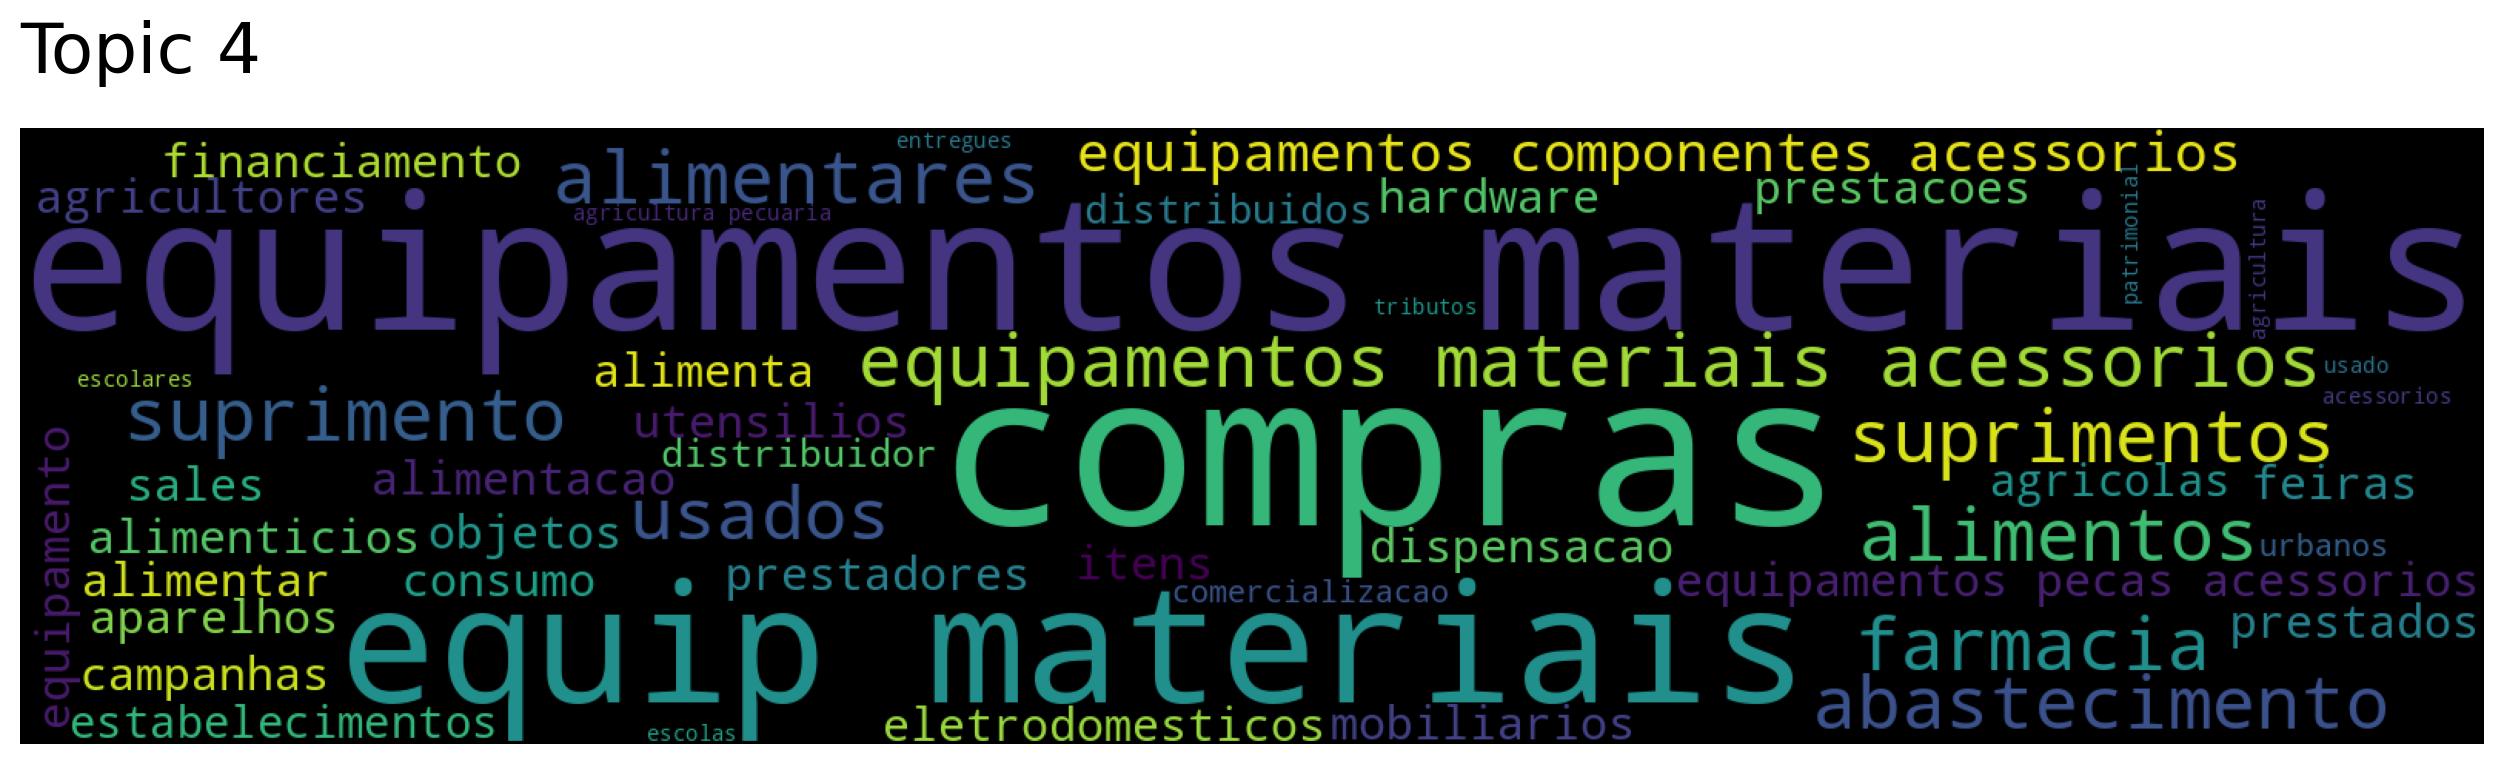

In [12]:
for i in range(0, 5):
    model.generate_topic_wordcloud(topic_num=i, reduced=True)

In [12]:
import gensim.corpora as corpora
from gensim.utils import tokenize
from gensim.models import CoherenceModel

topic_words = model.topic_words

tokenized = [list(tokenize(s)) for s in docs]
id2word = corpora.Dictionary(tokenized)
corpus = [id2word.doc2bow(text) for text in tokenized]
        
cm = CoherenceModel(topics=[s.tolist() for s in topic_words] ,texts=tokenized
                    , corpus=corpus, dictionary=id2word, coherence='c_v')
        
print("Model Coherence C_V is:{0}".format(cm.get_coherence()))

Model Coherence C_V is:0.5674395322609074


In [13]:
import gensim.corpora as corpora
from gensim.utils import tokenize
from gensim.models import CoherenceModel

topic_words = model.topic_words_reduced

tokenized = [list(tokenize(s)) for s in docs]
id2word = corpora.Dictionary(tokenized)
corpus = [id2word.doc2bow(text) for text in tokenized]
        
cm = CoherenceModel(topics=[s.tolist() for s in topic_words] ,texts=tokenized
                    , corpus=corpus, dictionary=id2word, coherence='c_v')
        
print("Model Coherence C_V is:{0}".format(cm.get_coherence()))

In [18]:
## obs, usando o tokenizer padrao (e so removendo stopwords tivemos cv=0.70-0.72)

In [11]:
topic_words_red = model.topic_words_reduced

In [12]:
topic_words_red

array([['municipios', 'municipalidade', 'prefeito', 'urbano', 'urbanos',
        'aluguel', 'esgoto', 'civico', 'distrito', 'cidades', 'estadual',
        'municipes', 'escolas', 'urbana', 'vereador', 'santiago',
        'ambulancias', 'gastos', 'escolar', 'abastecimento', 'comarca',
        'despesa', 'urbanas', 'reparticoes', 'farmacia', 'arrecadacao',
        'pre escola', 'distritos', 'comarcas', 'licenciamento',
        'servico', 'ruas', 'borracharia', 'salzano', 'localidade',
        'rodoviaria', 'esgotos', 'obrigatorios', 'rodoviarias', 'sacos',
        'despesas', 'rodoviario', 'bolsas', 'luvas', 'bolsa',
        'utilitarios', 'bebedouros', 'saco', 'necessitam', 'sanitaria'],
       ['necessitam', 'requisitos', 'necessario', 'necessaria',
        'necessarias', 'exigidos', 'exigencias', 'obrigatorios', 'caps',
        'humana', 'humanos', 'equipamentos materiais',
        'equipamentos materiais acessorios', 'especificos', 'obriga',
        'entr', 'quantidades', 'esgotos', 

## VER TODAS AS PALAVRAS STOPWORDS EXTRAS PRA ADICIONAR

In [17]:
topic_words_normal[0]

array(['contratual', 'contratos', 'contratante', 'contratada', 'especial',
       'tais', 'especiais', 'contratados', 'previdenciario', 'contratado',
       'privada', 'privadas', 'acima', 'pesada', 'pocos', 'etc', 'unica',
       'setembro', 'caps', 'excepcionais', 'mun', 'pre', 'pesadas',
       'privado', 'pesados', 'exceto', 'contratar', 'agosto', 'similar',
       'padre', 'casos', 'especializadas', 'concreto', 'brigada', 'poco',
       'prefeito', 'especificacao', 'aproximadamente', 'pesado', 'unico',
       'anterior', 'preventiva', 'trabalhadores', 'padua',
       'especializado', 'fechado', 'cessao', 'julho', 'especificados',
       'exclusiva'], dtype='<U35')

In [20]:
cosine_scores_reduced = []

for index, num_docs in model.topic_sizes_reduced.items():
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=index, num_docs=num_docs, reduced=True)
    cosine_scores_reduced.append(np.mean(document_scores))

In [21]:
np.mean(cosine_scores_reduced)

0.47002244

In [40]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=928, num_docs=14)

In [41]:
np.mean(document_scores)

0.6120101

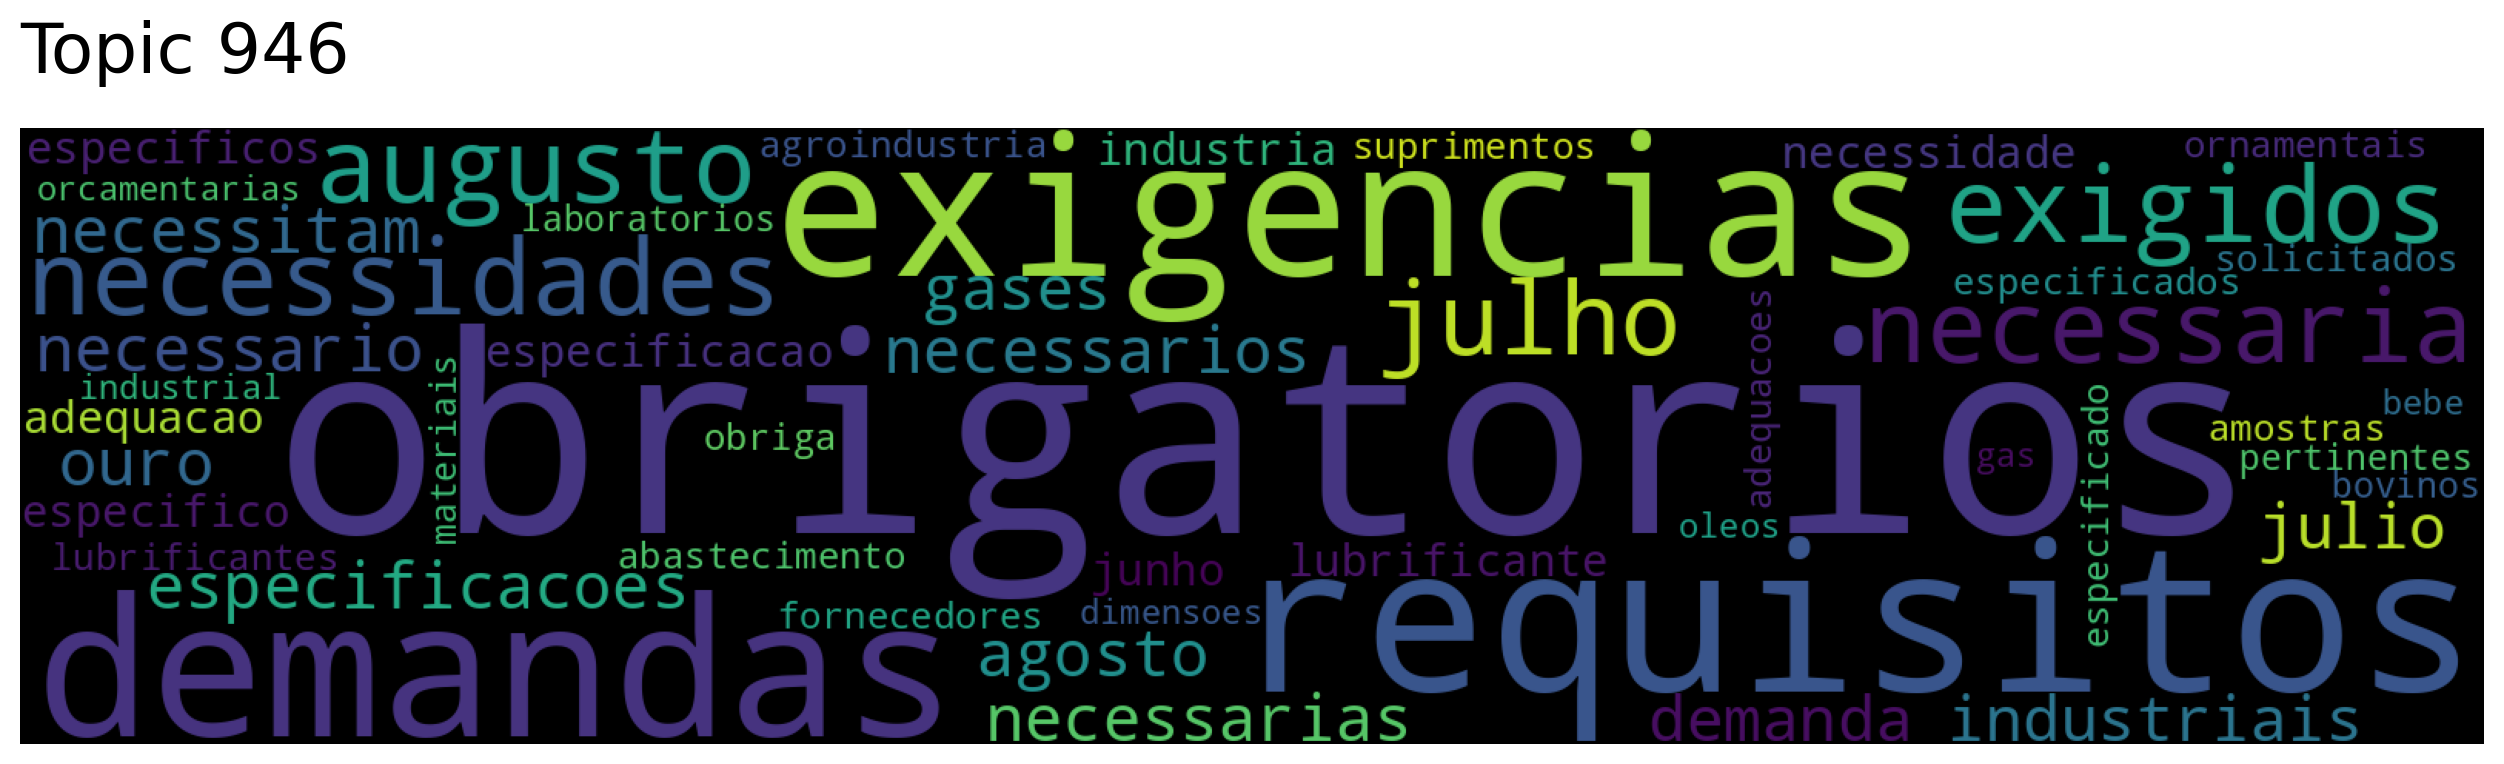

In [16]:
model.generate_topic_wordcloud(topic_num=946)

In [ ]:

>>> model.get_num_topics()
77
